First few rows of the dataset:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       N

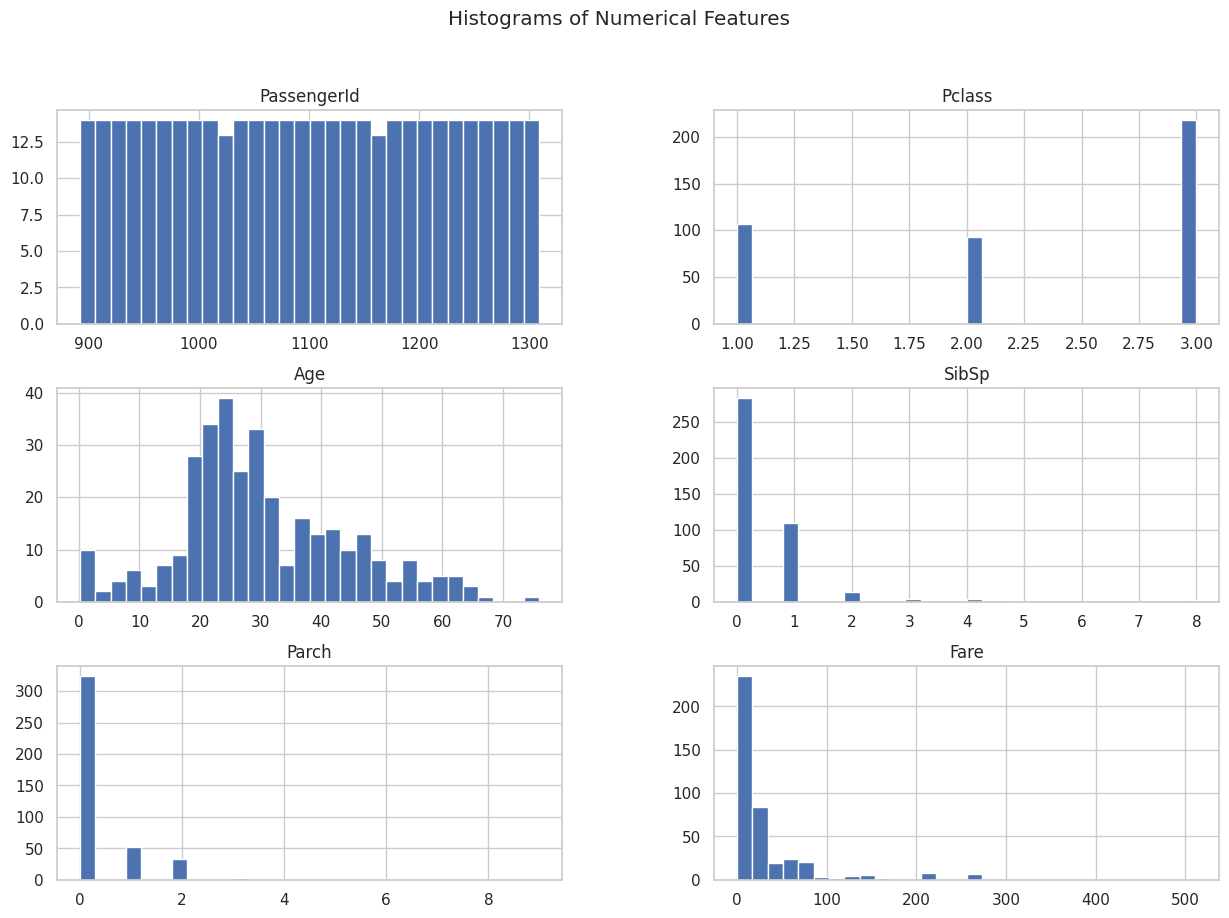

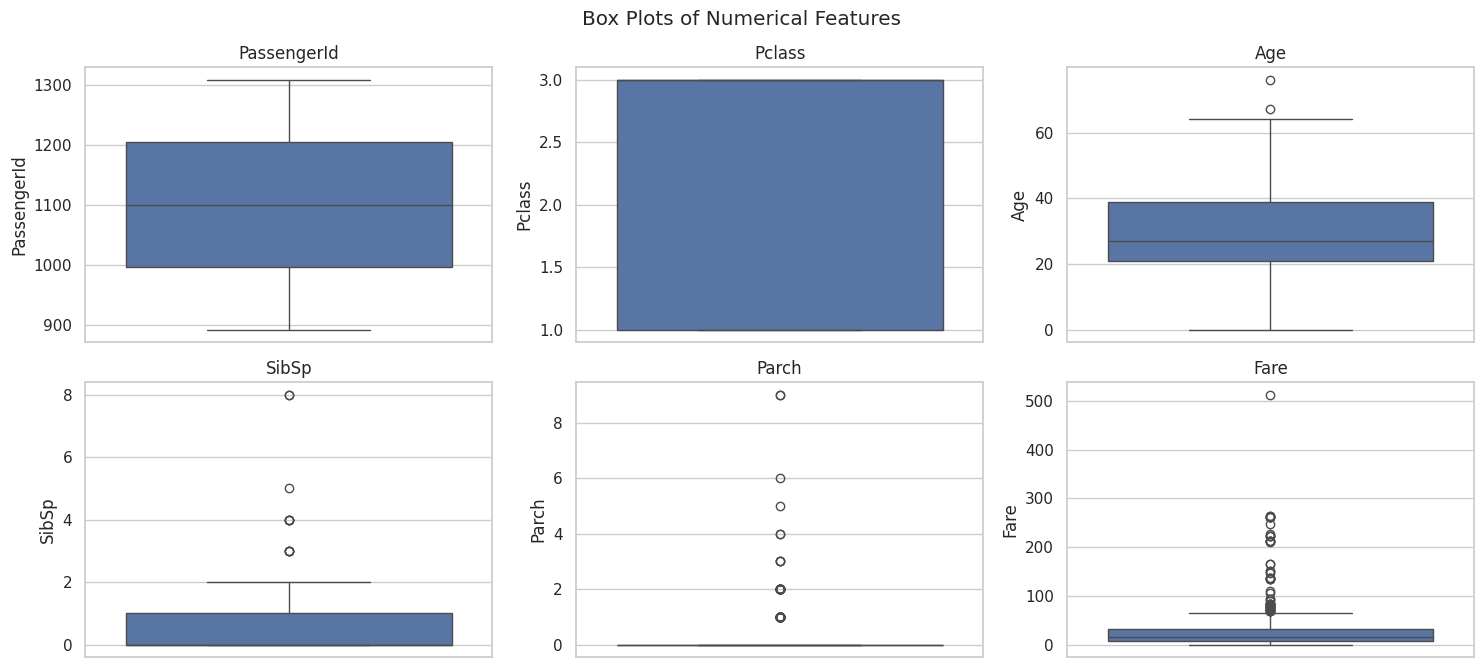

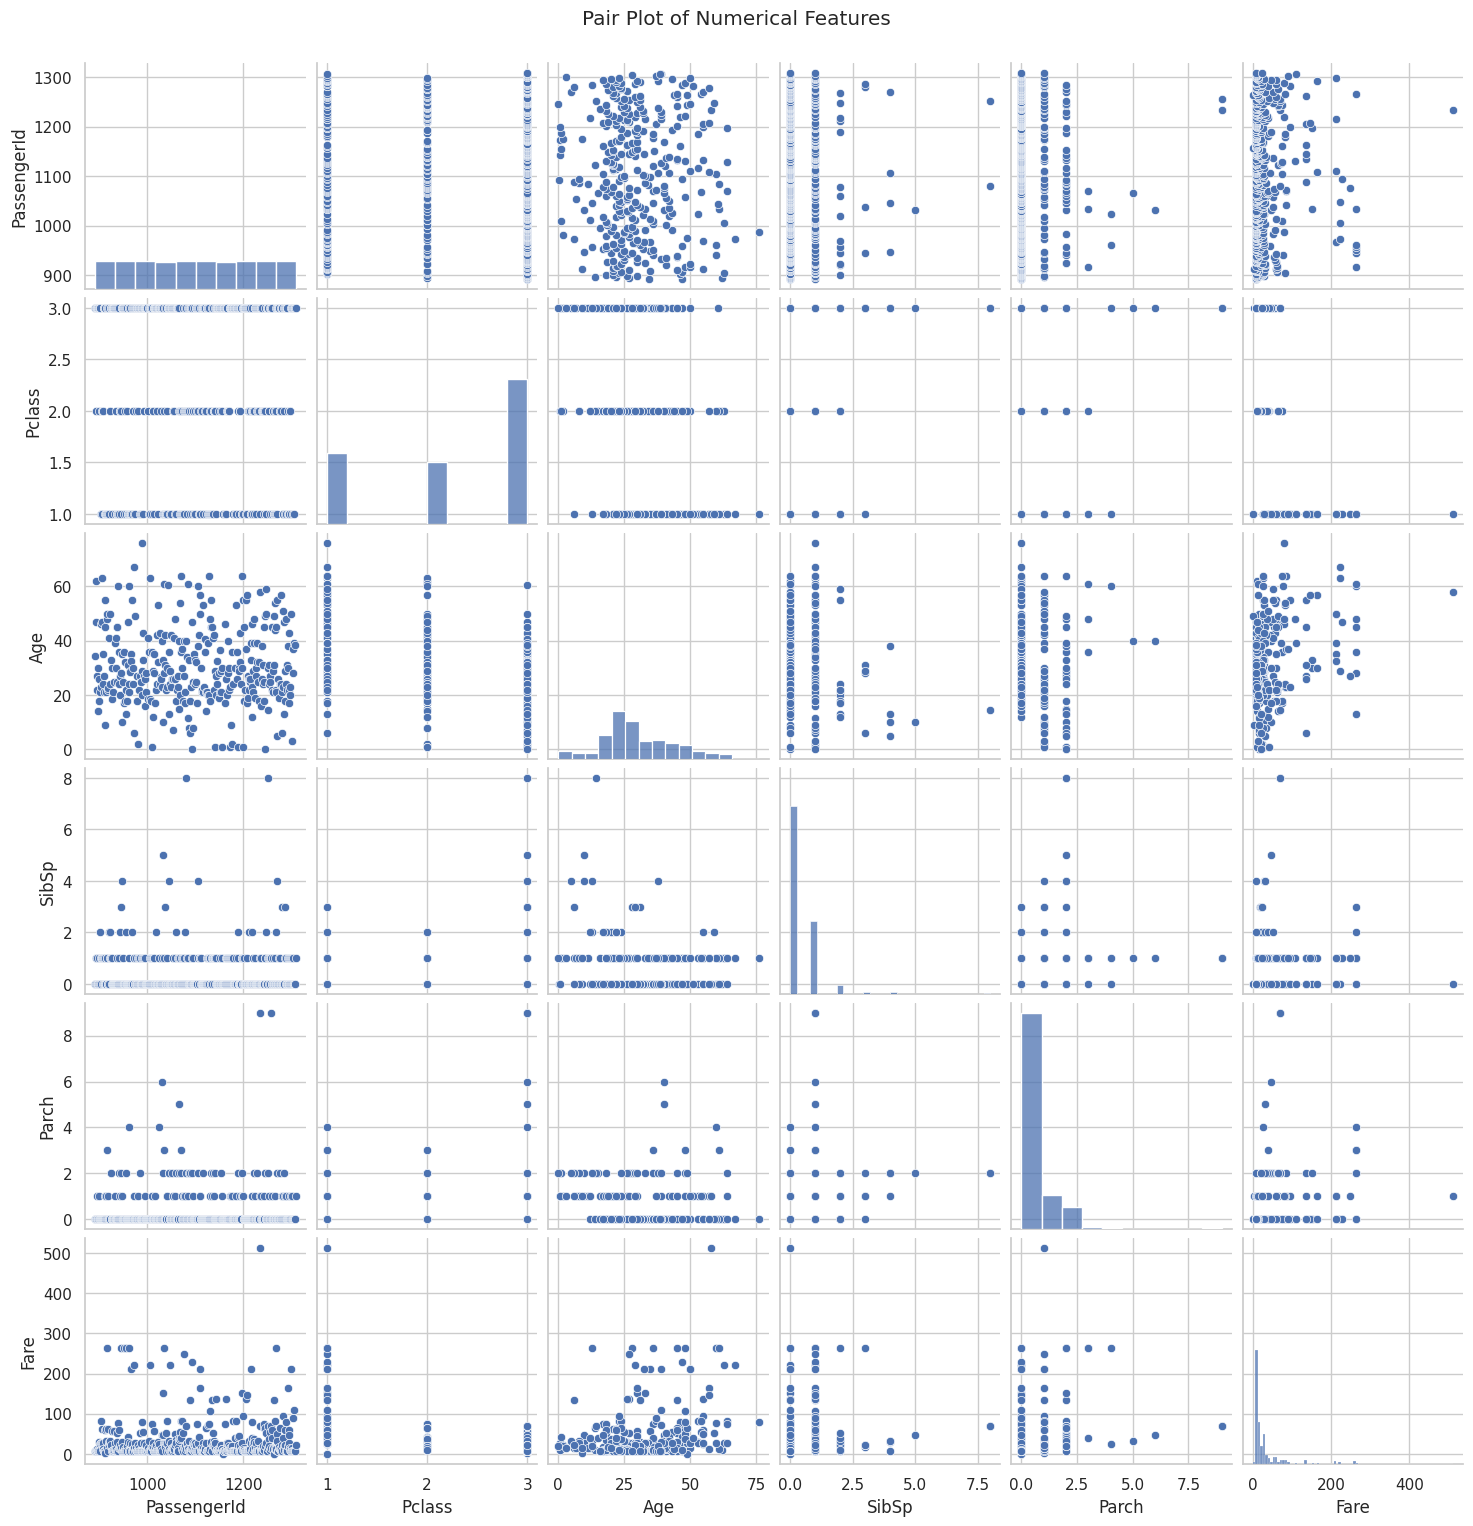

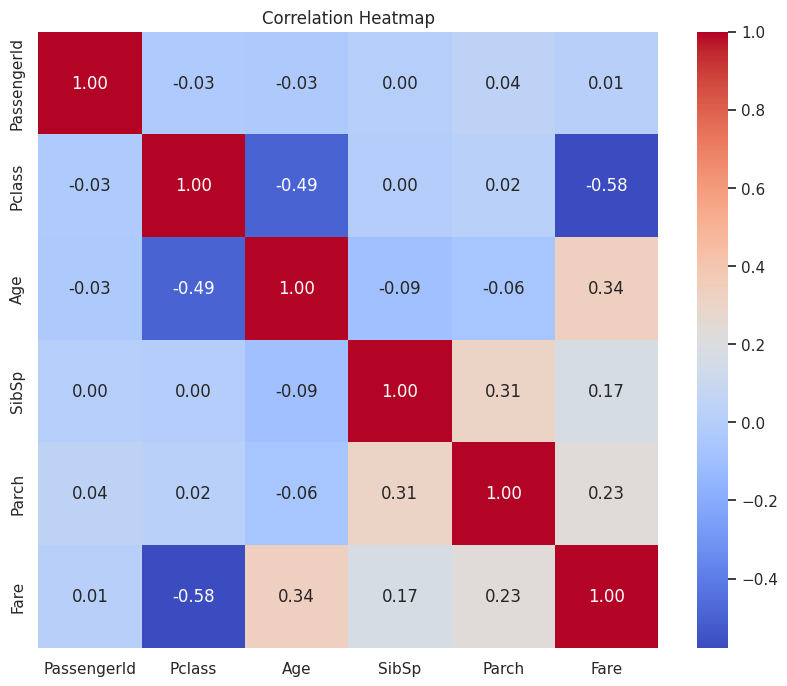

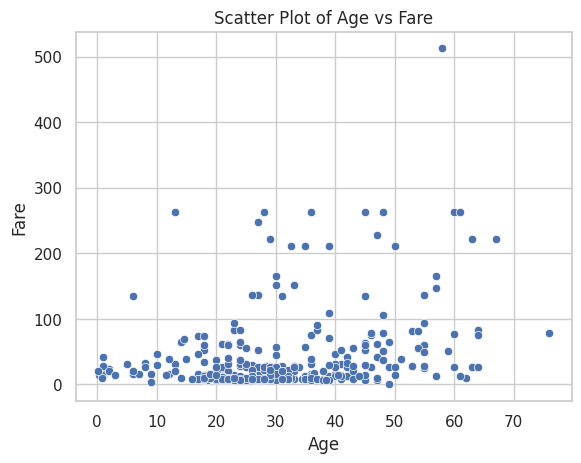

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

test_data = pd.read_csv('/content/Titanic_test.csv')
train_data = pd.read_csv('/content/Titanic_train.csv')


# a. Perform exploratory data analysis (EDA)
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(test_data.head())

# Display basic information about the dataset
print("\nDataset information:")
print(test_data.info())

# Display summary statistics for numerical features
print("\nSummary statistics for numerical features:")
print(test_data.describe())

# Display summary statistics for categorical features
print("\nSummary statistics for categorical features:")
print(test_data.describe(include=['O']))

# b. Examine the features, their types, and summary statistics
# Display the data types of each feature
print("\nData types of each feature:")
print(test_data.dtypes)

# c. Create visualizations
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histograms for numerical features
test_data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(test_data.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=test_data[col])
    plt.title(col)
plt.suptitle('Box Plots of Numerical Features')
plt.tight_layout()
plt.show()

# Pair plot to visualize relationships between numerical features
sns.pairplot(test_data.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = test_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Analyze any patterns or correlations observed in the data
# For example, let's look at the correlation between 'Age' and 'Fare'
sns.scatterplot(x='Age', y='Fare', data=test_data)
plt.title('Scatter Plot of Age vs Fare')
plt.show()

Accuracy: 0.7989
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

ROC-AUC Score: 0.8798


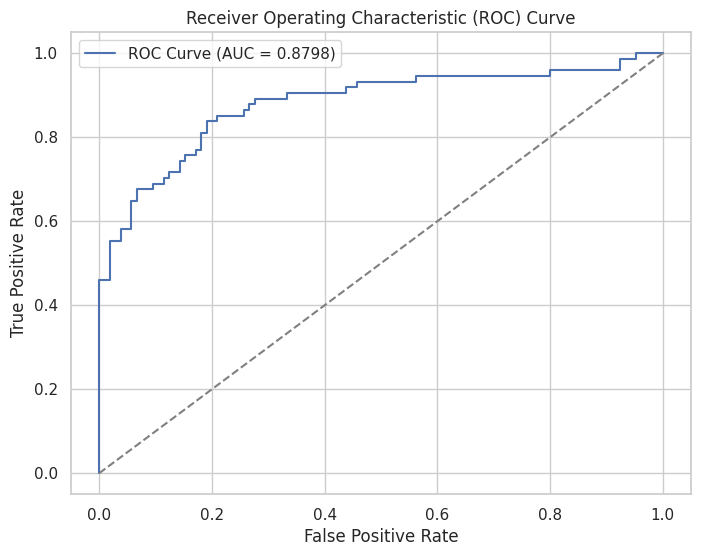

Feature Importance:
  Feature  Coefficient
1     Sex     1.285353
5    Fare     0.173042
4   Parch    -0.108891
3   SibSp    -0.375414
2     Age    -0.408801
0  Pclass    -0.779964

Interpretation of coefficients:
Pclass: negative impact on survival probability (coefficient = -0.7800)
Sex: positive impact on survival probability (coefficient = 1.2854)
Age: negative impact on survival probability (coefficient = -0.4088)
SibSp: negative impact on survival probability (coefficient = -0.3754)
Parch: negative impact on survival probability (coefficient = -0.1089)
Fare: positive impact on survival probability (coefficient = 0.1730)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Preprocessing: Selecting relevant features and handling missing values
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'

# Convert categorical variable 'Sex' to numerical
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1}) # Also for test_data

# Impute missing values for numerical and categorical features
# Define numerical and categorical features for imputation
numerical_features = ['Age', 'Fare']
categorical_features = ['Embarked', 'Pclass', 'Sex', 'SibSp', 'Parch']

# Create imputers for numerical and categorical features
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to training data
train_data[numerical_features] = num_imputer.fit_transform(train_data[numerical_features])
train_data[categorical_features] = cat_imputer.fit_transform(train_data[categorical_features])

# Apply imputation to testing data
test_data[numerical_features] = num_imputer.transform(test_data[numerical_features])
test_data[categorical_features] = cat_imputer.transform(test_data[categorical_features])


# Handle missing values by filling with the median value
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Selecting features and target variable
X = train_data[features]
y = train_data[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building and training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Visualizing the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Interpretation of coefficients
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("Feature Importance:")
print(feature_importance)

# Discussing significance of features
print("\nInterpretation of coefficients:")
for feature, coef in zip(features, coefficients):
    significance = "positive" if coef > 0 else "negative"
    print(f"{feature}: {significance} impact on survival probability (coefficient = {coef:.4f})")

In [ ]:
#Interview Questions:

#1. What is the difference between precision and recall?

#Precision:
#Precision measures the accuracy of the positive predictions. It answers the question Of all the instances predicted as positive, how many are actually positive?
      #Formula : Precision= True Positives (TP)​/(True Positives (TP)+False Positives (FP))
#High precision means the model has fewer false positives (i.e., it is very confident when it predicts the positive class).
#Precision is important when the cost of false positives is high.

#Recall:
#Recall measures the ability of the model to identify all positive instances. It answers the question Of all the actual positive instances, how many did the model correctly predict?
     #Formula : Recall= True Positives (TP)/(True Positives (TP)+False Negatives (FN))
#High recall means the model has fewer false negatives.
#Recall is important when the cost of false negatives is high.


#2. What is cross-validation, and why is it important in binary classification?
#Cross-validation is a resampling technique used to evaluate the performance of a machine learning model on a limited dataset. It involves partitioning the dataset into multiple subsets, training the model on some subsets, and validating it on the remaining subsets. The most common form of cross-validation is k-fold cross-validation.
  #The dataset is divided into k equal-sized subsets (folds).
#The model is trained k times, each time using k-1 folds for training and the remaining 1 fold for validation.
#The performance metric (e.g., accuracy, precision, recall) is calculated for each fold.
#The final performance metric is the average of the metrics from all folds.

#Cross Validation Betters the Estimation of Model Performance.
#CV Reduces Overfitting of the model.
#Cross-validation is often used in conjunction with techniques like Grid Search or Random Search to find the best hyperparameters for the model. It ensures that the chosen hyperparameters generalize well across different subsets of the data.
#In binary classification, especially with imbalanced datasets, cross-validation can be combined with techniques like stratified k-fold cross-validation. This ensures that each fold maintains the same proportion of positive and negative samples as the original dataset, leading to more reliable performance metrics.
